# Chargement des librairies et fonctions utiles

In [1]:
import numpy as np
import math
from function import (
    EPS,
    gradient_descent,
)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from segmenter import Segmenter

# Importation de l'image à segmenter puis redimensionnement

In [2]:
from PIL import Image

img = Image.open("../data/test/src_hand.jpg").convert("L")
img = img.resize((100, 100))
img = np.array(img)


# Normalisation de l'image 

On normalise l'image pour que chaque pixel de $w$ sois dans l'intervalle $[-1,1]$ grâce à la formule:

$$w = (w-\mu)/\sigma$$ 

avec $\mu$ la moyenne de tous les pixels de l'image et $\sigma$ l'ecart type de tous les pixels de l'image.

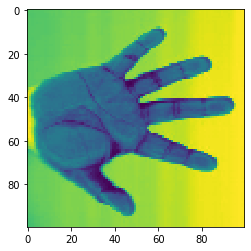

In [3]:
mean = np.mean(img)
std = np.std(img)
img = (img - mean) / std
plt.imshow(img)

# Paramètres de notre segmenteur : 
* `u`: image de base (nécessaire au calcul du terme $\|w-u\|_{2}^{2}$).
* `step_w` : le pas de la descente de gradient pour l'itération en $w$.
* `step_phi`: le pas de la descente de gradient pour l'itération en $\phi$.
* `eps` : la valeur de epsilon pour la fonction $H_{\epsilon}$.
* `lambda` : le coefficient $\lambda$ devant le terme : $\sum \limits_{\underset{((m,n), (m, n+1)) \notin \partial \Omega}{\underset{((m,n),(m+1, n)) \notin \partial \Omega}{m,n = 1}}}^{N} |\nabla w_{m,n}|^2$
* `mu` : Le coefficient $\mu$ devant le terme  : $\|w-u\|_{2}^{2}$.
* `it` : le nombre d'itérations dans l'algorithme de descente.
* `verbose` : un booleen qui indique si on veut des affichages ou non.
* `mode` : Le type d'algorithme de descente que on utilise (dans ce projet nous utiliserons seleument un algorithme de descente à pas fixe).

In [4]:
optimiser_param = {
    "u": img,
    "step_w": 0.1,
    "step_phi": 1,
    "eps": 0.1,
    "lambda_": 0.5,
    "mu": 0.5,
    "it": 6,
    "verbose": True,
    "mode": "standard",
}

# Instanciation de l'objet Segmenter 

In [5]:
segmenter = Segmenter(optimiser_param)

# Segmentation de l'image

In [6]:
segmenter.segment()

itération 0/6
830
itération 0 : w gradient: 62.12190240689528
itération 0 : phi gradient: 0.2887013031127226
itération 0 munford_shah functional: 40972.824116211435
itération 1/6
830
itération 1 : w gradient: 34.76873191135679
itération 1 : phi gradient: 0.04379109109974916
itération 1 munford_shah functional: 40346.0689340899
itération 2/6
830
itération 2 : w gradient: 22.5281381846121
itération 2 : phi gradient: 0.050337258395728474
itération 2 munford_shah functional: 39929.5943382287
itération 3/6
830
itération 3 : w gradient: 15.88583462896011
itération 3 : phi gradient: 0.184301745644186
itération 3 munford_shah functional: 39625.36772645327
itération 4/6
830
itération 4 : w gradient: 11.886057824700453
itération 4 : phi gradient: 0.04452362101586837
itération 4 munford_shah functional: 39390.92086858325
itération 5/6
830
itération 5 : w gradient: 9.17854867438008
itération 5 : phi gradient: 0.002235725597204756
itération 5 munford_shah functional: 39204.37862494089



# Tableau de bord de notre algorithme

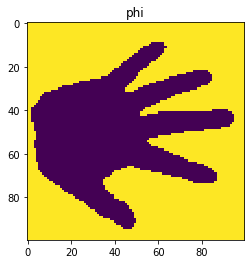

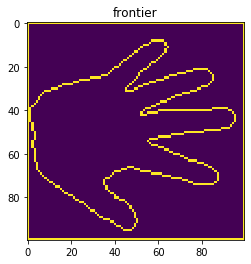

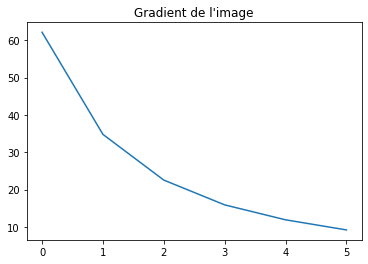

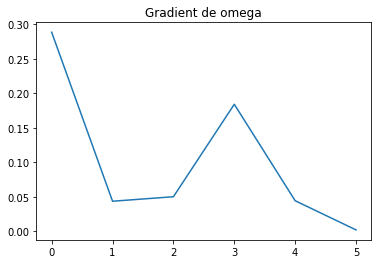

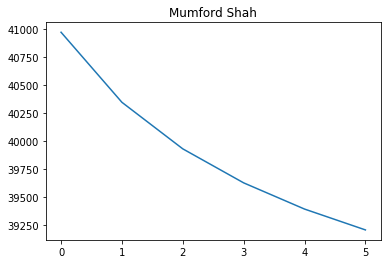

In [7]:
segmenter.plot_stats()